In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyod.utils.data import generate_data
from sklearn.ensemble import IsolationForest

#### Data syntetic generation

In [2]:
X_train, X_test, y_train, y_test = generate_data(behaviour='new', random_state=42)

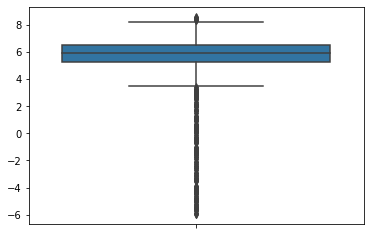

In [3]:
sns.boxplot(y=X_train)
plt.show()

Using the boxplot we can see a lot of outliers above the lower fence, lets test its creating a model using the Isolation Forest

#### Creating and training the detection model

In [4]:
isf = IsolationForest(n_estimators=1000, bootstrap=True)
isf.fit(X_train) # unsupervised

IsolationForest(bootstrap=True, n_estimators=1000)

In [5]:
X_test = pd.DataFrame(X_test, columns=['column_a', 'column_b'])
y_test = pd.DataFrame(y_test, columns=['target'])
df = pd.concat([X_test, y_test], axis=1)

#### Counting how many outliers do we have in this dataset
The target variable here is only for convinience and test, its not used to train our model

In [6]:
df['target'][df['target'] == 1].count()

50

#### Predicting the outliers

In [7]:
df['predict'] = isf.fit_predict(X_test)

#### Our brand new data drame

In [8]:
df

,column_a,column_b,target,predict
0,6.173238,5.723545,0.0,1
1,4.464880,5.937299,0.0,1
2,8.595721,5.007491,0.0,-1
3,4.552561,7.544354,0.0,-1
4,6.591843,6.149475,0.0,1
...,...,...,...,...
495,4.955172,-1.922757,1.0,-1
496,-0.532570,2.137366,1.0,-1
497,0.516257,-1.837368,1.0,-1
498,-0.772263,3.533770,1.0,-1


#### Lets verify if we did a good job using test set of data

real outlier

In [9]:
df['predict'].loc[df['target'] == 1].value_counts(normalize=True).mul(100)

-1    98.0
 1     2.0
Name: predict, dtype: float64

not outlier

In [10]:
df['predict'].loc[df['target'] == 0].value_counts(normalize=True).mul(100)

 1    90.888889
-1     9.111111
Name: predict, dtype: float64

As we can see, the Isolate Forest did a good job with new set of data